## Interval Estimation
Assume that a sample from an at-risk population with size = 20, such that 13 subjects are tested positive. Calculate Wald & Agresti-Coull intervals for sample means.

In [10]:
n = 20; x=13; ntilde=n+4
phat = x/n
ptilde = (x+2)/ntilde

In [11]:
z = qnorm(c(.025, .975))
z

[1] -1.959964  1.959964

### Wald CI

In [12]:
se_Wald = sqrt(phat * (1-phat) / n)
ci_Wald = round(phat + z * se_Wald, 3)
ci_Wald
ci_Wald[2] - ci_Wald[1]

[1] 0.441 0.859

[1] 0.418

### Agresti-Coull CI

In [ ]:
se_AC = sqrt(ptilde * (1 - ptilde) / n)
ci_AC = round(ptilde + z * se_AC, 3)
ci_AC
ci_AC[2] - ci_AC[1]

[1] 0.413 0.837

[1] 0.424

## Bayesian Analysis

### Case 1: Alpha is .5 & Beta is .5

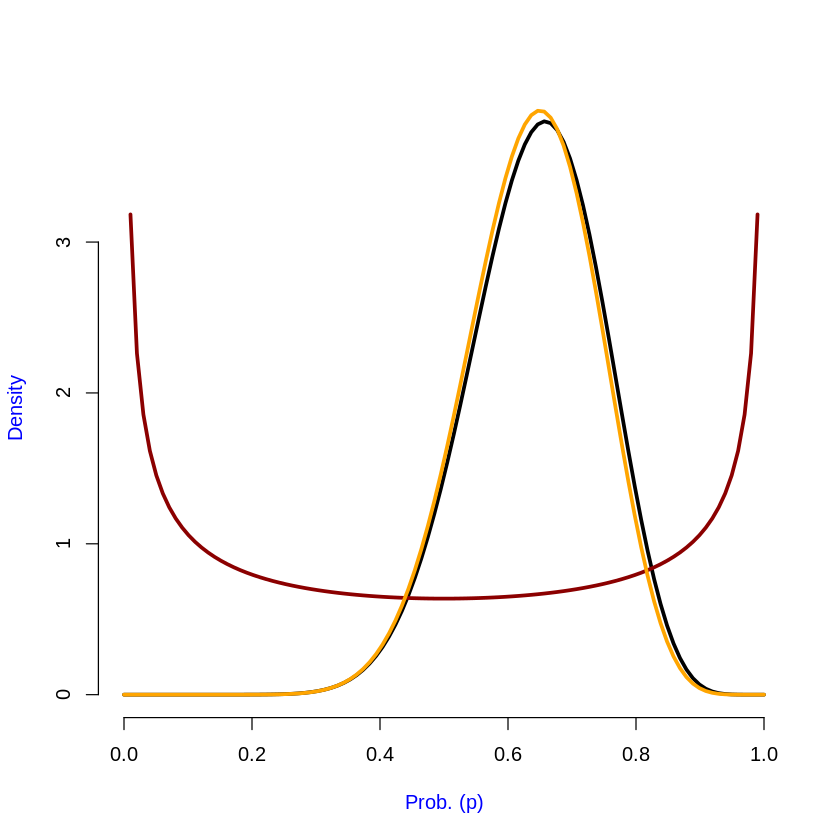

In [34]:
alpha = .5; beta = .5
pVals = seq(0, 1, length=100)
# posterior
plot(pVals, dbeta(pVals, x + alpha, n-x + beta), type="l", bty="n", col.lab="blue", main=NULL, ylab="Density", xlab="Prob. (p)", lwd=3)
# prior
lines(pVals, dbeta(pVals, alpha, beta), lwd=3, col='darkred')
# likelihood
lines(pVals, dbeta(pVals, x + 1 , n - x + 1), lwd=3, col='orange')

#### Bayes' 95% CI

In [27]:
ci_Bayes_1 = round(qbeta(c(.025, .975), x + alpha, n - x + beta), 3)
ci_Bayes_1
ci_Bayes_1[2] - ci_Bayes_1[1]

[1] 0.432 0.828

[1] 0.396

### Case 2: Alpha is 4, Beta is 10

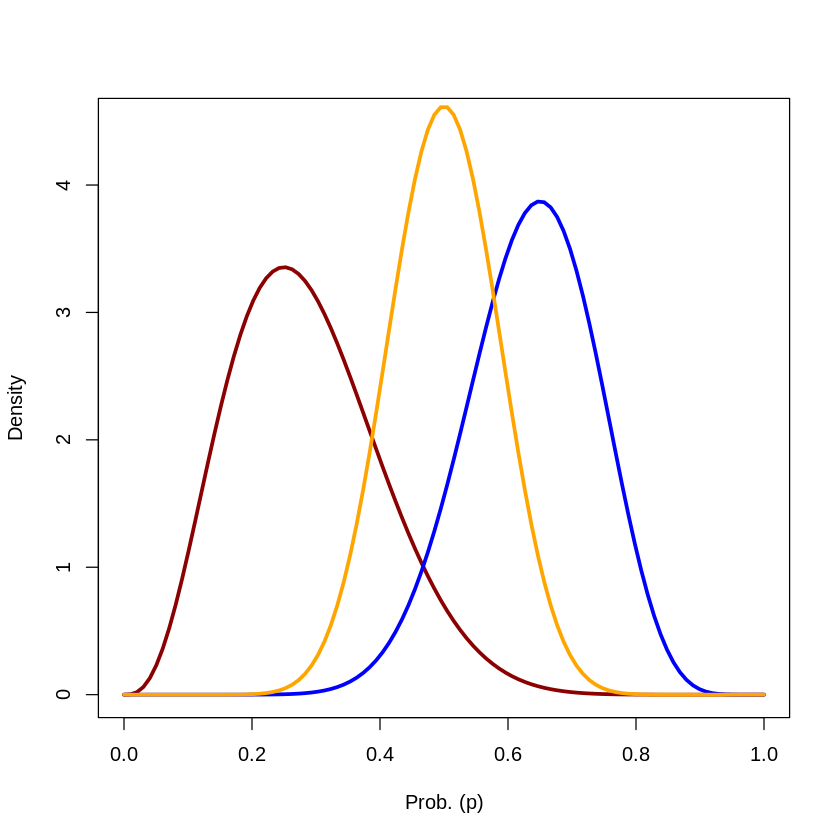

In [37]:
alpha = 4; beta = 10
# prior
plot(pVals, dbeta(pVals, alpha, beta), col='darkred', main='', type = 'l', lwd=3, ylim=c(0, 4.5), ylab='Density', xlab='Prob. (p)')
# likelihood
lines(pVals, dbeta(pVals, x + 1, n - x + 1), col='blue', lwd=3)
# posterior
lines(pVals, dbeta(pVals, x + alpha, n - x + beta), col='orange', lwd=3)

In [48]:
ci_Bayes_2 = round(qbeta(c(.025, .975), x + alpha, n-x+beta), 3)
ci_Bayes_2
ci_Bayes_2[2] - ci_Bayes_2[1]

[1] 0.335 0.665

[1] 0.33

### HPD Interval
Note that default values for alpha and beta is .5.

In [52]:
install.packages("binom")
library(binom)
out = binom.bayes(13, 20, type="highest")
l = out$lower; u = out$upper
round(c(l, u), 3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.442 0.836

#### Plot of HPD Confidence Interval

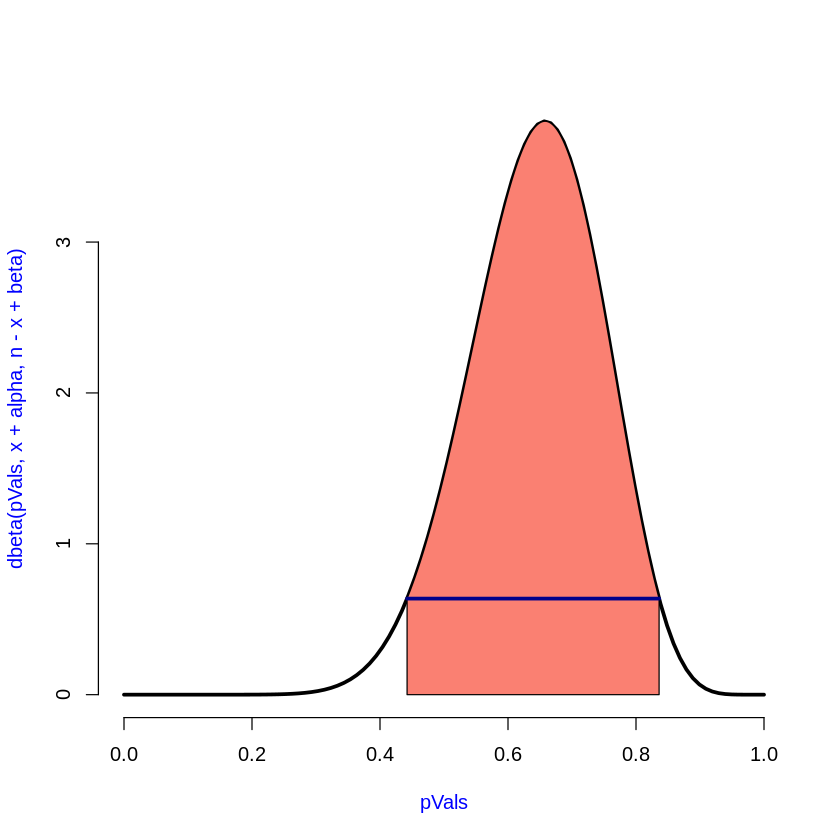

In [64]:
alpha = .5; beta = .5
plot(pVals, dbeta(pVals, x + alpha, n-x + beta), col.lab="blue", main='', bty="n", type="l", lwd=3)
pVals2 = seq(l, u, length=1000)
polygon(c(l, pVals2, u), c(0, dbeta(pVals2, x+alpha, n-x+beta), 0), col="salmon")
lines(c(l, u), c(dbeta(l, x+alpha, n-x + beta), dbeta(u, x+alpha, n-x+beta)), lwd=3, col="darkblue")
